In [1]:
import os
from os import path as op
import numpy as np
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist
import vlgp
from vlgp import util, simulation

In [2]:
# Set dimensions and simulation parameters
K1 = 500  # Number of observations for Group 1
K2 = 800  # Number of observations for Group 2
K = K1 + K2  # Total number of observations
D = 6  # Total latent dimensions
T = 250  # Number of time points
t = np.linspace(0, 2, T)  # Time intervals

d_s = 2  # Shared latent dimension
d_1 = 2  # Independent latent dimension for group 1
d_2 = 2  # Independent latent dimension for group 2

rho = 1.0  # Scale for GP kernel
l = 2.0  # Length scale for GP kernel
nu = 0.1  # Noise variance for observations

# Set factor loadings
A_1 = np.random.randn(K1, d_1)
A_2 = np.random.randn(K2, d_2)
A_s1 = np.random.randn(K1, d_s)
A_s2 = np.random.randn(K2, d_s)

A = np.block([[A_s1, A_1, np.zeros((K1, d_2))],
              [A_s2, np.zeros((K2, d_1)), A_2]])  # Group 2

def kernel_function(t1, t2, rho, l):
    """Squared exponential kernel."""
    dist_sq = cdist(t1.reshape(-1, 1), t2.reshape(-1, 1), metric='sqeuclidean')
    return rho * np.exp(-dist_sq / (2 * l ** 2))

K_t = kernel_function(t, t, rho, l)

z_shared = np.random.multivariate_normal(np.zeros(T), K_t, size=d_s).T
z_1 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_1).T
z_2 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_2).T

Z = np.hstack([z_shared, z_1, z_2])
Z

array([[-1.33383969, -1.05062343,  0.46288452,  1.09795107,  0.10388509,
        -1.2690107 ],
       [-1.33430735, -1.04452975,  0.46816073,  1.09578381,  0.10302035,
        -1.27313619],
       [-1.33476333, -1.03845963,  0.47342544,  1.09358194,  0.1022014 ,
        -1.277226  ],
       ...,
       [-1.02840654, -0.41604963,  0.97161742,  0.15449523,  1.20408444,
        -1.39220598],
       [-1.0251735 , -0.41512958,  0.96952938,  0.15346586,  1.2104399 ,
        -1.39058418],
       [-1.02192864, -0.41419642,  0.96740461,  0.15249534,  1.21676597,
        -1.38895501]])

In [3]:
ntrial = 10  # Number of trials
nbin = 250  # Number of bins per trial to match T=250 as previously set
dim = 6  # Number latent dimensions
Z_cut = Z[:(Z.shape[0] // nbin) * nbin]
trials = [{'ID': i, 'y': Z_cut[i * nbin: (i + 1) * nbin].reshape(nbin, dim)} for i in range(Z_cut.shape[0] // nbin)]
trials

[{'ID': 0,
  'y': array([[-1.33383969, -1.05062343,  0.46288452,  1.09795107,  0.10388509,
          -1.2690107 ],
         [-1.33430735, -1.04452975,  0.46816073,  1.09578381,  0.10302035,
          -1.27313619],
         [-1.33476333, -1.03845963,  0.47342544,  1.09358194,  0.1022014 ,
          -1.277226  ],
         ...,
         [-1.02840654, -0.41604963,  0.97161742,  0.15449523,  1.20408444,
          -1.39220598],
         [-1.0251735 , -0.41512958,  0.96952938,  0.15346586,  1.2104399 ,
          -1.39058418],
         [-1.02192864, -0.41419642,  0.96740461,  0.15249534,  1.21676597,
          -1.38895501]])}]

In [4]:
#np.random.seed(0)

fit = vlgp.fit(
    trials,  
    n_factors=3,  # dimensionality of latent process
    max_iter=20,  # maximum number of iterations
    min_iter=10  # minimum number of iterations
)

Initializing
Initialized
Fitting
Iteration    1, E-step 0.13s, M-step 0.03s
Iteration    2, E-step 0.13s, M-step 0.04s
Iteration    3, E-step 0.13s, M-step 0.03s
Iteration    4, E-step 0.14s, M-step 0.03s
Iteration    5, E-step 0.13s, M-step 0.03s
Iteration    6, E-step 0.11s, M-step 0.03s
Iteration    7, E-step 0.11s, M-step 0.03s
Iteration    8, E-step 0.15s, M-step 0.04s
Iteration    9, E-step 0.12s, M-step 0.03s
Iteration   10, E-step 0.11s, M-step 0.03s
Iteration   11, E-step 0.12s, M-step 0.03s
Iteration   12, E-step 0.11s, M-step 0.03s
Iteration   13, E-step 0.12s, M-step 0.04s
Iteration   14, E-step 0.13s, M-step 0.04s
Iteration   15, E-step 0.13s, M-step 0.03s
Iteration   16, E-step 0.11s, M-step 0.03s
Iteration   17, E-step 0.11s, M-step 0.03s
Iteration   18, E-step 0.11s, M-step 0.03s
Iteration   19, E-step 0.11s, M-step 0.03s
Iteration   20, E-step 0.12s, M-step 0.03s
Inferring
0.12s
Done


In [5]:
fit

{'trials': [{'ID': 0,
   'y': array([[-1.33383969, -1.05062343,  0.46288452,  1.09795107,  0.10388509,
           -1.2690107 ],
          [-1.33430735, -1.04452975,  0.46816073,  1.09578381,  0.10302035,
           -1.27313619],
          [-1.33476333, -1.03845963,  0.47342544,  1.09358194,  0.1022014 ,
           -1.277226  ],
          ...,
          [-1.02840654, -0.41604963,  0.97161742,  0.15449523,  1.20408444,
           -1.39220598],
          [-1.0251735 , -0.41512958,  0.96952938,  0.15346586,  1.2104399 ,
           -1.39058418],
          [-1.02192864, -0.41419642,  0.96740461,  0.15249534,  1.21676597,
           -1.38895501]]),
   'mu': array([[ 1.98865921e+46, -3.89241498e+46, -4.09489719e+45],
          [ 2.35226440e+46, -4.47764705e+46, -5.54083628e+45],
          [ 2.69794690e+46, -5.03715327e+46, -6.92369917e+45],
          [ 3.01581240e+46, -5.55643037e+46, -8.20817036e+45],
          [ 3.29848733e+46, -6.02424622e+46, -9.36675846e+45],
          [ 3.54156535e+46, -

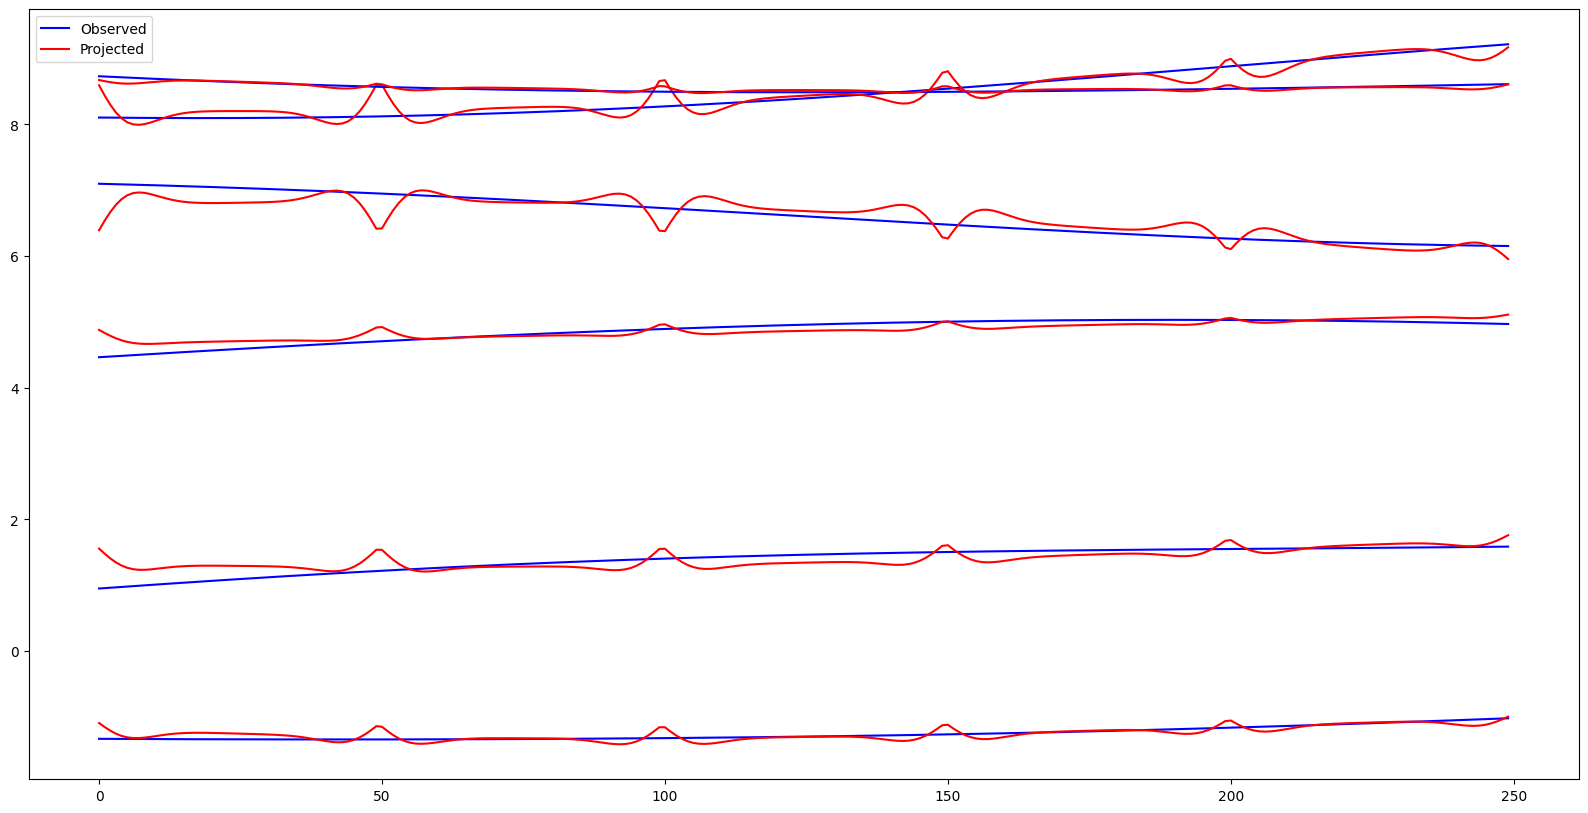

In [6]:
trials = fit['trials']  # extract trials
for i in range(len(trials)):
    trial = trials[i]
    x = trial['y']  # observed data
    mu = trial['mu']  # posterior latent

    # Calculate the projection matrix from latent space to observed space
    W, _, _, _ = np.linalg.lstsq(mu, x, rcond=None)
    mu_proj = mu @ W 
    
    # Plotting
    plt.figure(figsize=(20, 10))
    for j in range(x.shape[1]):
        offset = 2 * j
        plt.plot(x[:, j] + offset, 'b', label='Observed' if j == 0 else "")
        plt.plot(mu_proj[:, j] + offset, 'r', label='Projected' if j == 0 else "")
    plt.legend()
    plt.show()
    plt.close()


In [7]:
trials = fit['trials']  # extract trials
rmses = []  # List to store the RMSE of each trial

for i, trial in enumerate(trials):
    x = trial['y']  # observed data
    mu = trial['mu']  # posterior latent

    # Calculate the projection matrix from latent space to observed space
    W, _, _, _ = np.linalg.lstsq(mu, x, rcond=None)
    mu_proj = mu @ W  
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((x - mu_proj) ** 2))
    rmses.append(rmse)

rmses

[0.1106452354250785]

In [8]:
# Correlation Coefficients
def calculate_correlation(cor, pred):
    correlation_matrix = np.corrcoef(cor.T, pred.T)
    num_variables = cor.shape[1]
    return np.diag(correlation_matrix[num_variables:, :num_variables])

correlations = [calculate_correlation(trial['y'], mu @ W) for trial in trials]
correlations


[array([0.80236978, 0.65110791, 0.82928506, 0.85430239, 0.94187221,
        0.85687507])]

In [9]:
kTrial = 0;
trial = fit['trials'][kTrial]

In [10]:
samples = vlgp.sample_posterior(trial, fit['params'], 10, reg=1e-6)

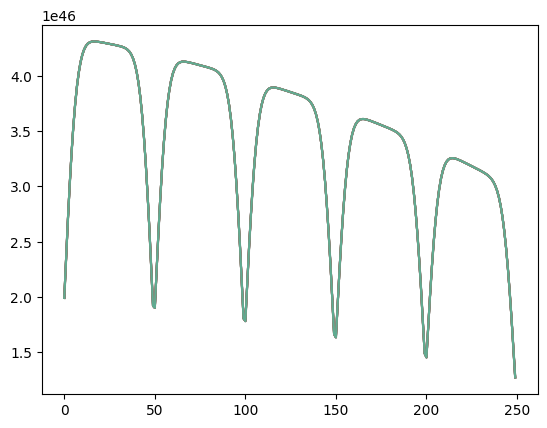

In [11]:
plt.figure()
mu = trial['mu']
v = trial['v'] # marginal variance
s = np.sqrt(v)
kFactor = 0
plt.fill_between(np.arange(mu.shape[0]), mu[:,kFactor]-2*s[:,kFactor], mu[:,kFactor]+2*s[:,kFactor], color=[.8,.8,.8], alpha=0.5)
plt.plot(mu[:,kFactor], 'k')
plt.plot(samples[:,:,kFactor].T, alpha=0.5);

In [12]:
# Z Z.transpose

In [13]:
# ask how important it is to use this model
# check how well it really does and if its worth it
# look at reconstruction error (rmse) and prediction error
# cross validated likelihood
# r squared and correlation (might be weird)
# eval model if using gauss isntead of poiss
# was gp even worth doing
# ask and explore answer to these questions
# how much of an improvement does each part of the model make to the complete model
# make sure to make fair comparisons (same latents, same vars, etc)
# benchmarking the model and justifying its use